In [265]:
"""DROME - A n l i s e de dados.ipynb
Automatically generated by Colaboratory.
## A N L I S E DE DADOS DE SENSORES DE TEMPERATURA DE EQUIPAMENTOS ULTRALOW DO SENAI CIMATEC BAHIA
 1. IMPORTANDO ARQUIVO DE DADOS DO SENSOR ESCOLHIDO
 2. CONVERTENDO A COLUNA DATA PARA FORMATO DE DATETIME64 DO PYTON
 3. COLOCANDO A DATA_HORA COMO INDICE DA S R I E
"""
import pandas as pd
import matplotlib.pyplot as plt

temp = pd.read_csv("medidas_minuto_1.csv")
temp = temp[["data_hora", "valor"]]
temp.data_hora = pd.to_datetime(temp.data_hora)
temp.valor = pd.to_numeric(temp.valor)
temp.set_index("data_hora", inplace=True)
filtro = (
    (temp.valor != -1000)
    & (temp.index >= "2022-02-14 00:00")
    & (temp.index <= "2022-02-17 23:59")
)
temp = temp[filtro]
temp.info()
temp.head()
temp = temp.resample("T").median()
temp = temp.fillna(temp.mean())
temp.head()
# from google.colab import files
# temp.to_csv("temp.csv")
# qfiles.download("temp.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5760 entries, 2022-02-14 00:00:00 to 2022-02-17 23:59:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   valor   5760 non-null   float64
dtypes: float64(1)
memory usage: 90.0 KB


C:\Users\x530346\AppData\Local\Temp\ipykernel_2004\3375828692.py:24: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  temp = temp.resample("T").median()


,valor
data_hora,
2022-02-14 00:00:00,-38.7395
2022-02-14 00:01:00,-38.6330
2022-02-14 00:02:00,-38.3504
2022-02-14 00:03:00,-39.1072
2022-02-14 00:04:00,-38.0616


<Axes: xlabel='data_hora'>

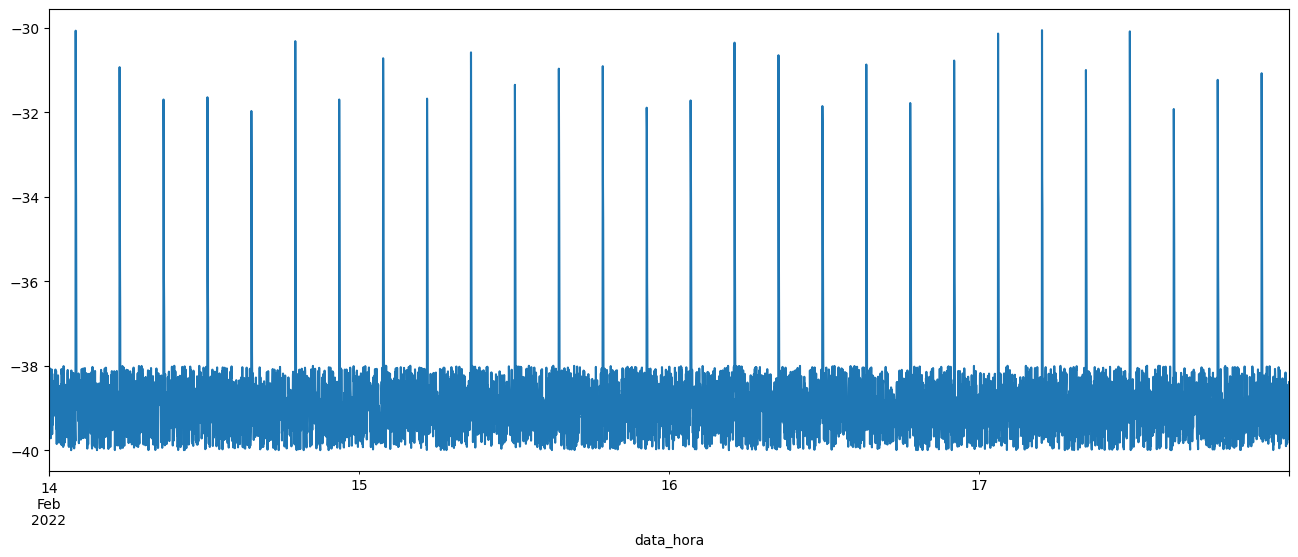

In [266]:
"""PLOTANDO A CURVA DE TEMPERATURA IMPORTADA E CONVERTIDA

Aplicando filtro para reduzir o tamanho dos dados por conta do r u d o
(Tratar isso depois)
"""
temp.valor.plot(figsize=(16, 6))

<Axes: xlabel='data_hora'>

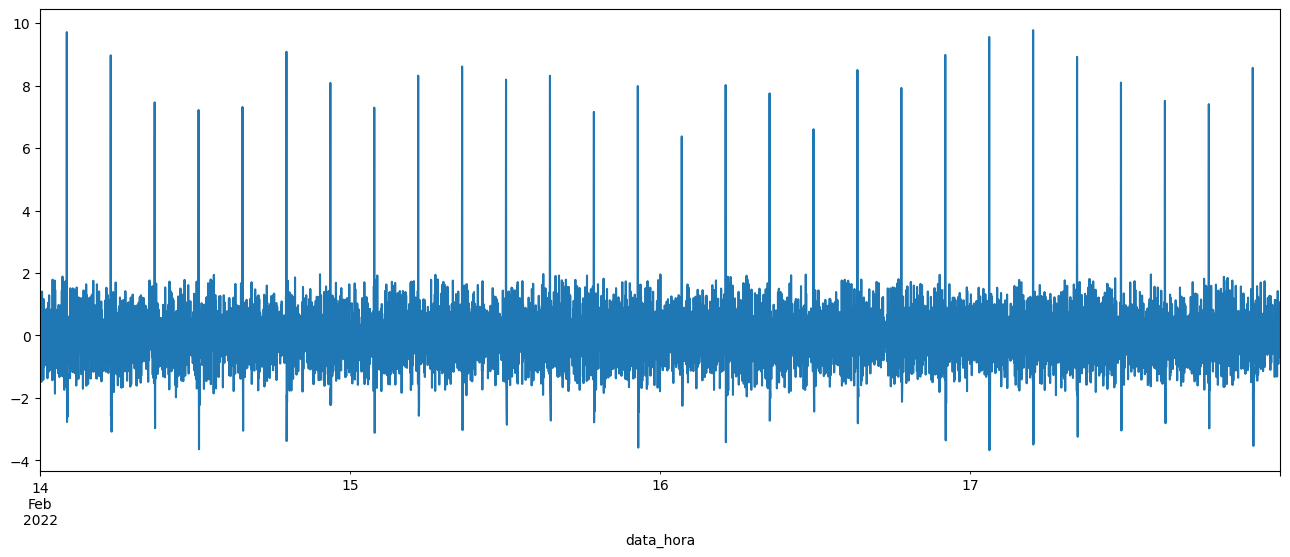

In [267]:
"""APLICANDO DIFEREN AS PARA ANALISAR A SAZONALIDADE DA S R I E"""
temp.valor.diff().plot(figsize=(16, 6))

<Axes: xlabel='data_hora'>

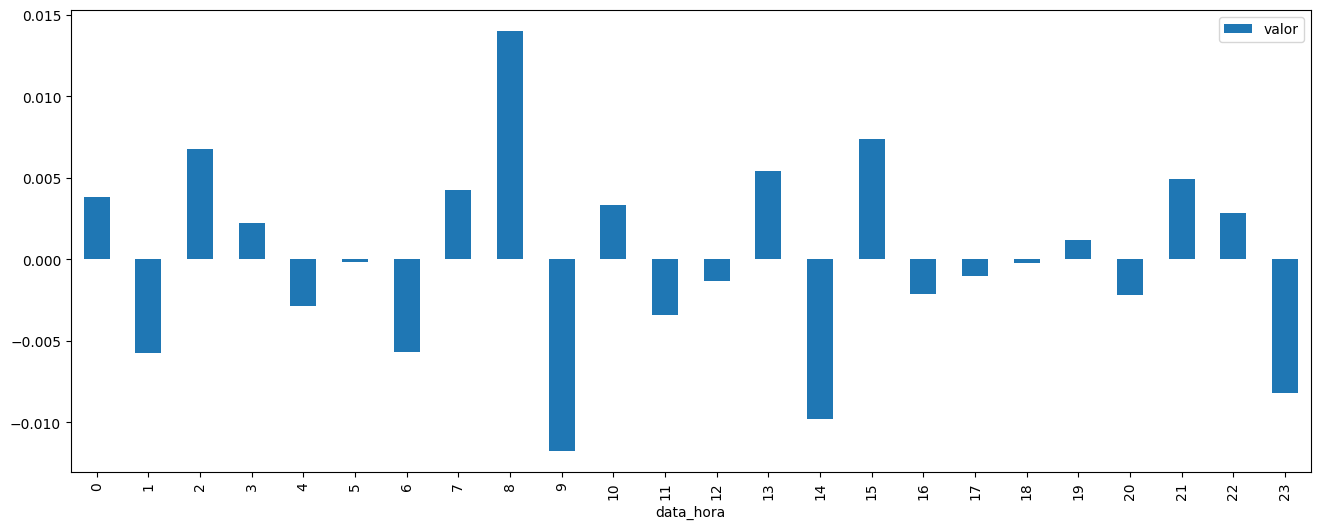

In [268]:
"""APRESENTANDO SAZONALIDADE POR HORA DO DIA"""
temp.diff().groupby(temp.index.hour).mean().plot(kind="bar", figsize=(16, 6))

<Figure size 1600x600 with 0 Axes>

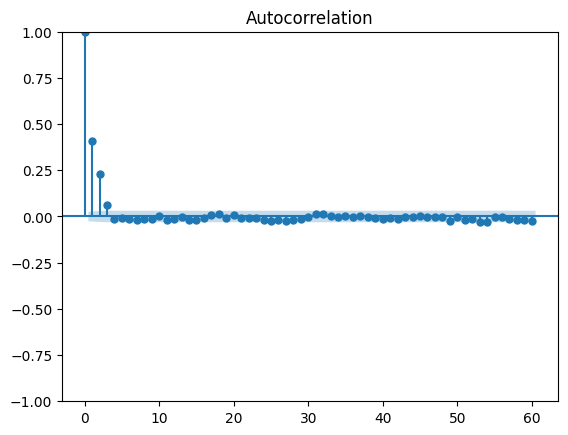

In [269]:
"""CALCULANDO A A U T O C O R R E L A O DOS DADOS EM 1 HORA

DADOS APRESENTAM BOA C O R R E L A O E DEMONSTRA UM PERFIL CICLICO
"""
#import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(16, 6))
plot_acf(temp["valor"], lags=60)
plt.show()

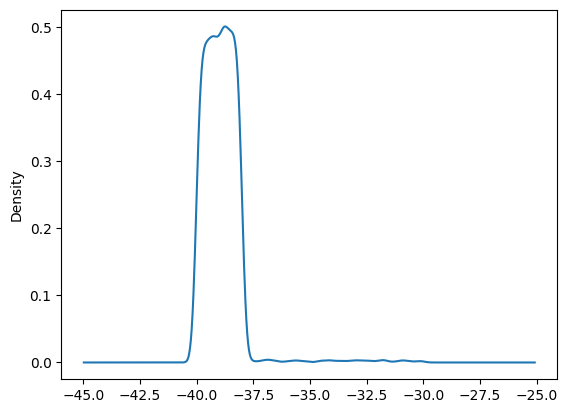

In [270]:
"""PLOTANDO O HISTOGRAMA PARA VALIDAR QUE OS DADOS OBEDECEM UMA
D I S T R I B U I O NORMAL"""
temp["valor"].plot(kind="kde")
plt.show()

In [271]:
"""RODANDO TESTE PARA VALIDAR QUE OS DADOS PERTECEM UMA
D I S T R I B U I O NORMAL"""
import scipy.stats as stats
skew = stats.skew(temp["valor"])
print(skew)

4.278033234557158


In [272]:

"""RODANDO TESTE PARA VALIDAR QUE OS DADOS PERTECEM UMA
D I S T R I B U I O NORMAL"""
from scipy.stats import normaltest

stat, p = normaltest(temp["valor"])
# p < 0.05 indica que a d i s t r i b u i o n o uma normal
print(p)
ad_stat, ad_critico, ad_teorico = stats.anderson(temp["valor"], "norm")
print(ad_stat)
print(ad_critico)
print(ad_teorico)

0.0
227.61649695046435
[0.576 0.656 0.786 0.917 1.091]
[15.  10.   5.   2.5  1. ]


c:\Users\x530346\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = to_offset(freq)
c:\Users\x530346\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.9981842450440571


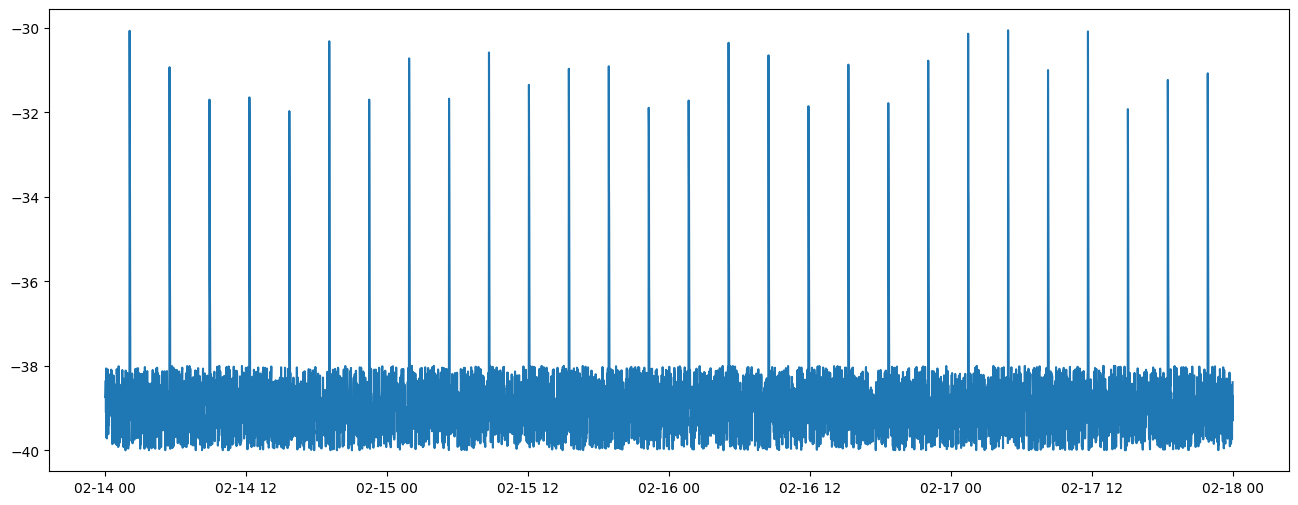

In [273]:
"""**TESTANDO MODELO ARIMA**"""
from statsmodels.tsa.arima.model import ARIMA


arima = ARIMA(temp.valor, freq="T", order=(3, 1, 10)).fit()

print((arima.resid**2).mean())

plt.figure(figsize=(16, 6))
plt.plot(temp["valor"])

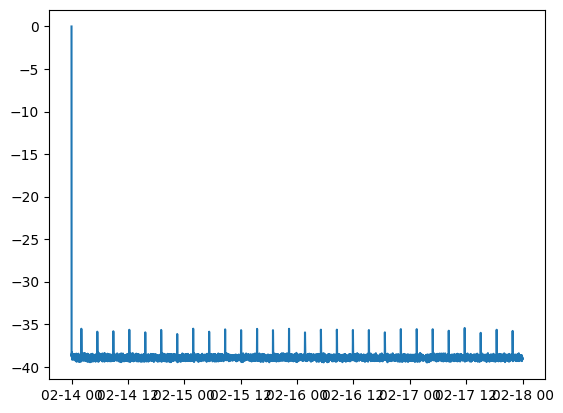

In [274]:
plt.plot(arima.predict(typ="levels"))

2022-02-18   -38.696617
Freq: min, dtype: float64


c:\Users\x530346\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


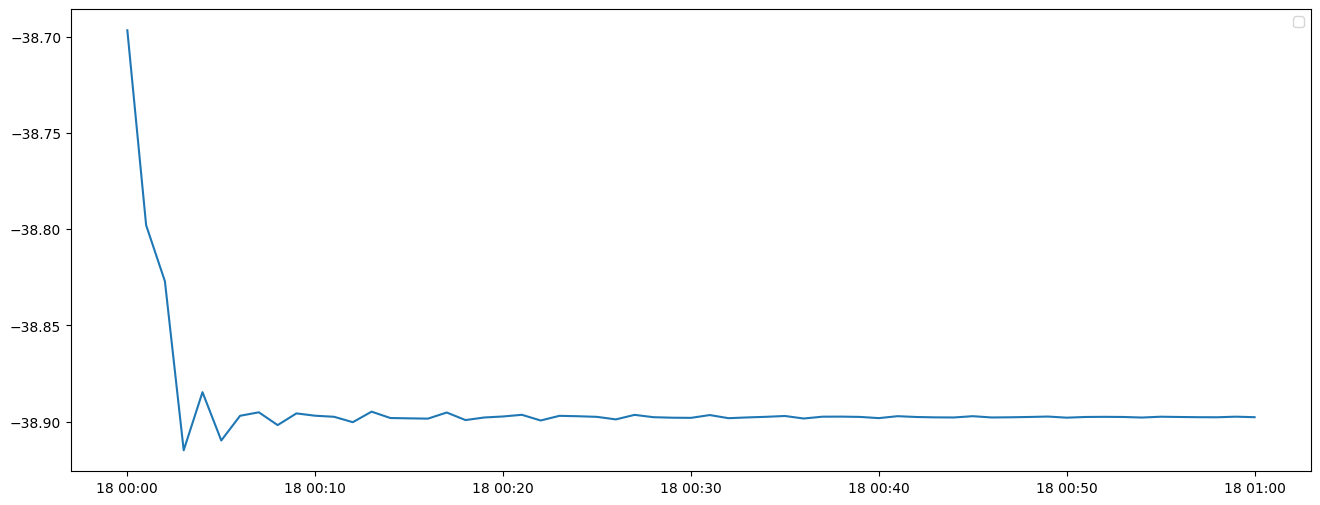

In [275]:
print(arima.forecast())
plt.figure(figsize=(16, 6))
plt.legend(["Dados de Treinamento (Reais)", "Modelo ARIMA", "Previs o"])
arima_data = arima.predict(
    typ="levels", start="2022-02-18 00:00:00", end="2022-02-18 01:00:00"
)
plt.plot(arima_data)


c:\Users\x530346\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:595: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  freq = to_offset(freq)
c:\Users\x530346\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


0.9981842450440571
2022-02-18   -38.696617
Freq: min, dtype: float64


c:\Users\x530346\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


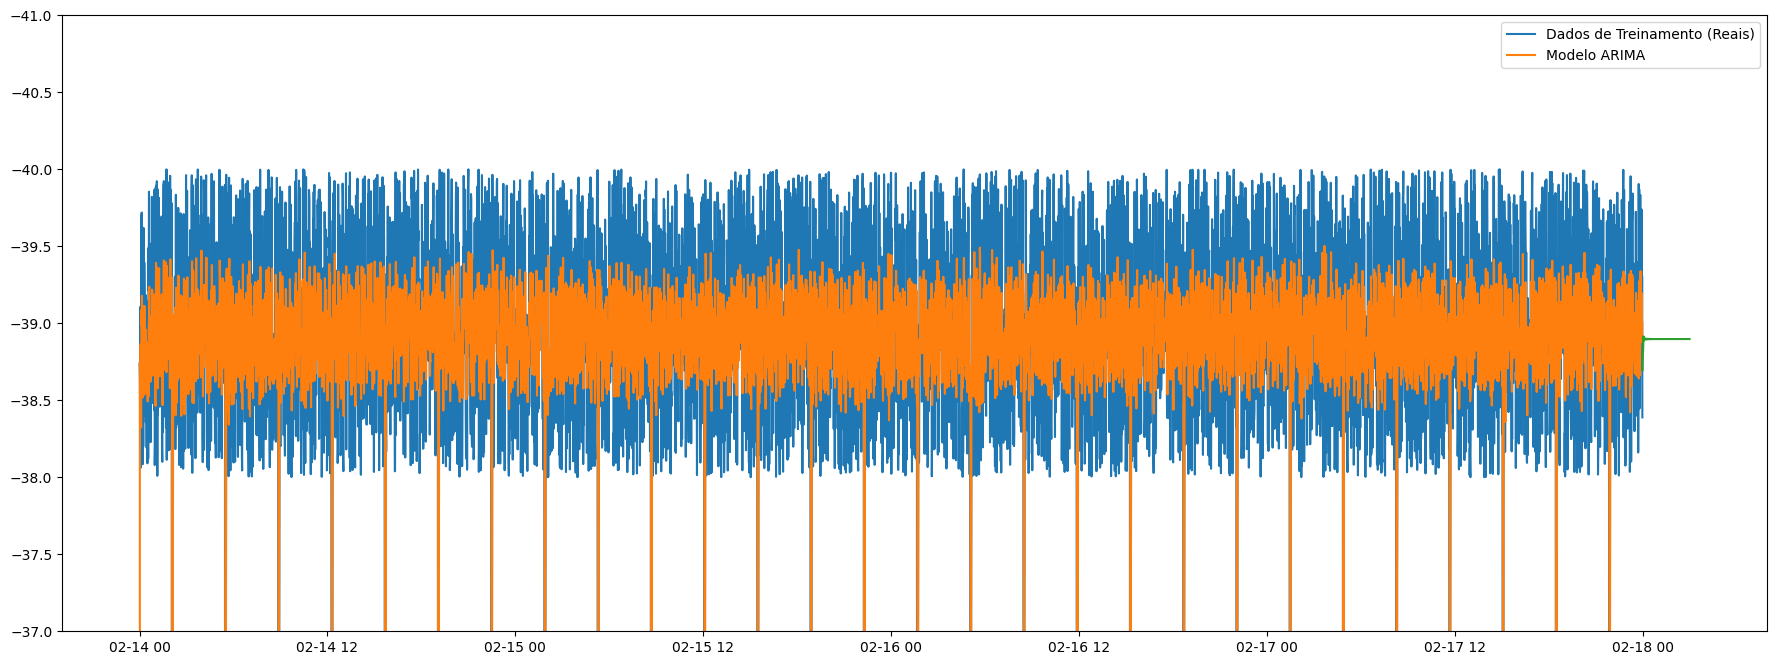

In [276]:
arima = ARIMA(temp.valor, freq="T", order=(3, 1, 10)).fit()

print((arima.resid**2).mean())

plt.figure(figsize=(22, 8))
plt.plot(temp["valor"])

plt.ylim(-37, -41)
plt.plot(arima.predict(typ="levels"))

print(arima.forecast())
plt.legend(["Dados de Treinamento (Reais)", "Modelo ARIMA", "Previs o"])
arima_data = arima.predict(
    typ="levels", start="2022-02-18 00:00:00", end="2022-02-18 03:00:00"
)

plt.plot(arima_data)